In [ ]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.
C:\Users\Daniel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Daniel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Daniel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Daniel\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [ ]:
inicio = '2019-01-01'
fin = '2021-02-17'
bitcoin = web.DataReader("BTC-USD", 'yahoo',inicio, fin)  # información de bitcoin
bitcoin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5.137610e+09,3845.194580


In [ ]:
len(bitcoin['Close'])

776

In [ ]:
bit_data=bitcoin['Close']
bit_data.head()

Date
2019-01-01    3843.520020
2019-01-02    3943.409424
2019-01-03    3836.741211
2019-01-04    3857.717529
2019-01-05    3845.194580
Name: Close, dtype: float64

In [ ]:
bit_data.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
               '2021-02-17', '2021-02-18'],
              dtype='datetime64[ns]', name='Date', length=776, freq=None)

In [ ]:
tsize = int(len(bit_data)*0.8) #Training size
vsize = int(len(bit_data)) - tsize #Validation size
print("Total data size: ",len(bit_data))
#print(len(df)*0.8)
print("Training data size: ",tsize)

Total data size:  776
Training data size:  620


In [ ]:
bit_data[0:10]

Date
2019-01-01    3843.520020
2019-01-02    3943.409424
2019-01-03    3836.741211
2019-01-04    3857.717529
2019-01-05    3845.194580
2019-01-06    4076.632568
2019-01-07    4025.248291
2019-01-08    4030.847900
2019-01-09    4035.296387
2019-01-10    3678.924561
Name: Close, dtype: float64

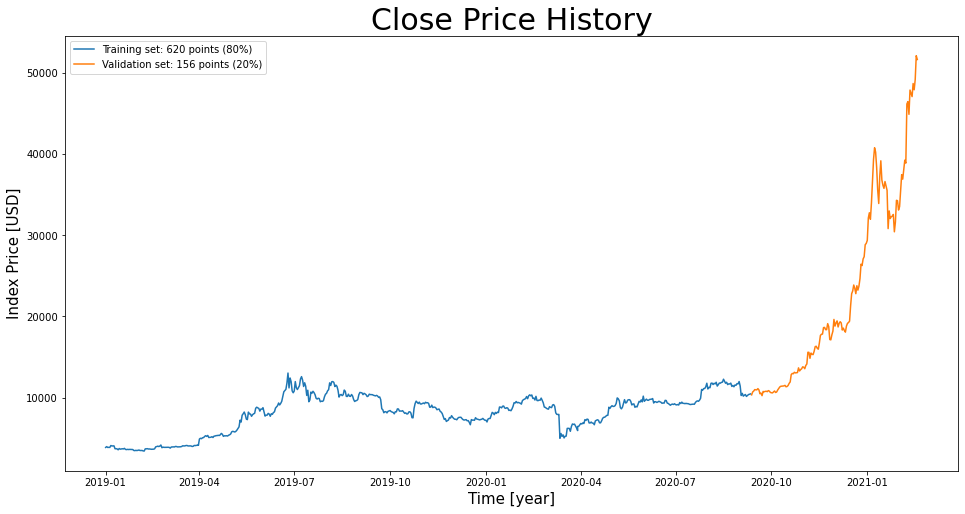

In [ ]:
#Plotting data
plt.figure(figsize=(16,8))
plt.plot(bit_data[:tsize], label='Training set: {0:.0f} points (80%)'.format(tsize))
plt.plot(bit_data[tsize:], label='Validation set: {0:.0f} points (20%)'.format(vsize))
#plt.plot(df['Close'])
plt.title("Close Price History", size = 30)
plt.xlabel("Time [year]", size = '15')
plt.ylabel("Index Price [USD]", size = '15') 
plt.legend()
plt.show()

In [ ]:
price=bit_data.values
price.reshape(-1,1)
print(price[:5])

[3843.52001953 3943.40942383 3836.74121094 3857.7175293  3845.19458008]


In [ ]:
#Scaling training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price.reshape(-1,1))

In [ ]:
#tipo de datos
type(scaled_data)


numpy.ndarray

In [ ]:
scaled_data[0:2,0]

array([0.00910877, 0.0111578 ])

In [ ]:
#Training data
#input(x): 'time_step' sequential data - output(y): 1 data (the next to the 60 previous data)
x_train, y_train = [], []
time_step = 60
for i in range(time_step,tsize):
    x_train.append(scaled_data[i-60:i,0]) #x
    y_train.append(scaled_data[i,0]) #y
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train.shape

(560, 60)

In [ ]:
x_train[0,1]

0.011157803484708642

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(560, 60, 1)

In [ ]:
x_train[0,1,0]

0.011157803484708642

In [ ]:
#Validation data
inputs = bit_data[len(bit_data) - vsize - 60:].values #predicting values, using past 60 from the train data
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
inputs.shape

(216, 1)

In [ ]:
#Note: train and validation data are overlaping each other in the first "time_step" (60) validation data 

x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Parameters of the LSTM neural network
na = 50 #Neurons in the LSTM network
dim_input=(x_train.shape[1],1)
dim_output=1

#Creating RNN
model = Sequential()
#model.add(LSTM(units=na, input_shape=dim_input))
model.add(LSTM(units=na, return_sequences=True, input_shape=dim_input))
model.add(LSTM(units=na)) #This and previous layer is to avoid the "blablabla" error
model.add(Dense(units=dim_output))
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#TRAINING
model.fit(x_train, y_train, epochs=20, batch_size=32) #What do epochs and batch_size mean in this case ?

#TESTING (PREDICTING)
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)


Epoch 1/20
560/560 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 2/20
560/560 [==============================] - 1s 1ms/step - loss: 7.1277e-04
Epoch 3/20
560/560 [==============================] - 1s 1ms/step - loss: 3.5173e-04
Epoch 4/20
560/560 [==============================] - 1s 1ms/step - loss: 2.4404e-04
Epoch 5/20
560/560 [==============================] - 1s 1ms/step - loss: 2.3251e-04
Epoch 6/20
560/560 [==============================] - 1s 1ms/step - loss: 2.1547e-04
Epoch 7/20
560/560 [==============================] - 1s 1ms/step - loss: 2.1766e-04
Epoch 8/20
560/560 [==============================] - 1s 1ms/step - loss: 2.0825e-04
Epoch 9/20
560/560 [==============================] - 1s 1ms/step - loss: 1.9810e-04
Epoch 10/20
560/560 [==============================] - 1s 1ms/step - loss: 1.8662e-04
Epoch 11/20
560/560 [==============================] - 1s 1ms/step - loss: 1.7753e-04
Epoch 12/20
560/560 [==============================] - 1s 1ms/step

In [ ]:
#for plotting
train = bit_data[:tsize]
train=train.to_frame()
valid = bit_data[tsize:]
valid=valid.to_frame()
valid['predictions']=closing_price


In [ ]:
valid.head()

,Close,predictions
Date,,
2020-09-12,10323.755859,10220.166992
2020-09-13,10680.837891,10208.257812
2020-09-14,10796.951172,10236.898438
2020-09-15,10974.905273,10299.560547
2020-09-16,10948.990234,10394.617188


In [ ]:
train.head()

,Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2020-09-12 to 2021-02-18
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        156 non-null    float64
 1   predictions  156 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 3.0 KB


Text(0, 0.5, 'Index Price [USD]')

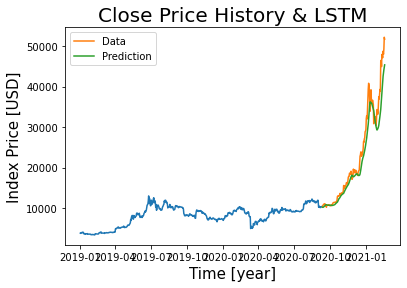

In [ ]:
plt.plot(train['Close'])
plot = plt.plot(valid[['Close','predictions']])
#plt.annotate("rms = "+str(rmsLSTM), xy=(data.index[1],300), size = 15)
plt.legend(plot, ("Data","Prediction"))
plt.title("Close Price History & LSTM", size = 20)
plt.xlabel("Time [year]", size = '15')
plt.ylabel("Index Price [USD]", size = '15')

Text(0, 0.5, 'Index Price [USD]')

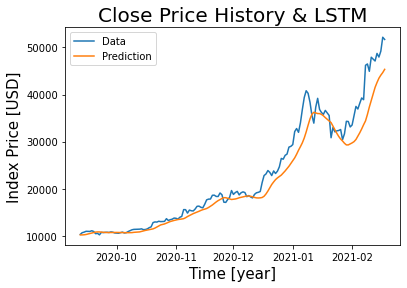

In [ ]:
plot = plt.plot(valid[['Close','predictions']])
plt.legend(plot, ("Data","Prediction"))
plt.title("Close Price History & LSTM", size = 20)
plt.xlabel("Time [year]", size = '15')
plt.ylabel("Index Price [USD]", size = '15') 

In [ ]:
# import zipfile

In [ ]:
# tweeter_zip=zipfile.ZipFile('C:/Users/Daniel/Downloads/tweets.csv.zip')
# #tweets.csv
# bct=tweeter_zip.read('tweets.csv')


KeyboardInterrupt



In [ ]:
!pip install "dask[dataframe]"

     |████████████████████████████████| 118 kB 3.8 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from dask.distributed import Client
#client=Client()

In [ ]:
import dask.dataframe as dd
columns=['timestamp','text']
df = dd.read_csv('drive/MyDrive/Colab Notebooks/tweets.csv', sep=';',sample=3000,usecols=columns)
type(df)
#dtype={'id': 'object','likes': 'float64','replies': 'float64','retweets': 'float64'} encoding='utf-8'  engine='python'
#dtype={'url': 'object'}

ParserError: ignored

In [ ]:
df.head(5)

ParserError: ignored

In [ ]:
df.columns

Index(['timestamp', 'text'], dtype='object')

In [ ]:
df.info(memory_usage=True).compute()

ParserError: ignored

In [ ]:
df2=df[['timestamp','text']]
type(df2)

dask.dataframe.core.DataFrame

In [ ]:
#  df2.compute()

In [ ]:
df2.head()

,timestamp,text
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [ ]:
df2.columns

Index(['timestamp', 'text'], dtype='object')

In [ ]:
df2.index

Dask Index Structure:
npartitions=66
    int64
      ...
    ...  
      ...
      ...
dtype: int64
Dask Name: getitem, 330 tasks

In [ ]:
pr_fechas=df2['timestamp'].str.partition("+")[[0,2]]
pr_fechas[0]

Dask Series Structure:
npartitions=66
    object
       ...
     ...  
       ...
       ...
Name: 0, dtype: object
Dask Name: getitem, 528 tasks

In [ ]:
pr_fechas.dtypes

0    object
2    object
dtype: object

In [ ]:
meta = ('time', pd.Timestamp)
# fe=df2['timestamp'].map_partitions(pd.to_datetime, format='%Y-%m-%d %H:%M:%S', meta=('datetime64[ns]'))
fechas=pr_fechas[0].map_partitions(pd.to_datetime,format='%Y-%m-%d %H:%M:%S',meta = ('datetime64[ns]'))

In [ ]:
type(fe)

dask.dataframe.core.Series

In [ ]:
type(fechas)

dask.dataframe.core.Series

In [ ]:
# df2.set_index(fe)
df2.head(5)

,timestamp,text
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [ ]:
df2['fecha']=fechas
df2.head(5)

,timestamp,text,fecha
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27 11:49:14
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27 11:49:18
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,2019-05-27 11:49:06
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27 11:49:22
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27 11:49:23


In [ ]:
df2['valor']=1
df2.head(5)

,timestamp,text,fecha,valor
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27 11:49:14,1
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27 11:49:18,1
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,2019-05-27 11:49:06,1
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27 11:49:22,1
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27 11:49:23,1


In [ ]:
# df2.groupby(df['fecha'].dt.days).sum('valor')

In [ ]:
ts=pd.Series(data=df2['valor'], index=df2['fecha'])

AssertionError: ignored

In [ ]:
df2.set_index(fechas).compute()

ParserError: ignored

In [ ]:
df2.resample()

In [ ]:
# fechas=pd.to_datetime(df2['timestamp'])

In [ ]:
df.columns

Index(['id', 'user', 'fullname', 'url', 'timestamp', 'replies', 'likes',
       'retweets', 'text'],
      dtype='object')

In [ ]:
df.dtypes

id             int64
user          object
fullname      object
url          float64
timestamp     object
replies        int64
likes          int64
retweets       int64
text          object
dtype: object

In [ ]:
df.timestamp

Dask Series Structure:
npartitions=66
    object
       ...
     ...  
       ...
       ...
Name: timestamp, dtype: object
Dask Name: getitem, 132 tasks

In [ ]:
fecha_prueba='05/12/1997 6:05:10 pm'
prueba=dt.datetime.strptime(fecha_prueba,'%d/%m/%Y %I:%M:%S %p')

In [ ]:
print(prueba)

1997-12-05 18:05:10


In [ ]:
type(prueba)

datetime.datetime

In [ ]:
# df['timestamp'].map_partitions(pd.to_datetime, columns='timestamp')

In [ ]:
def cambio (x):
    return dt.datetime.strptime(x.timestamp,'%d/%m/%Y %I:%M:%S %p')

In [ ]:
cambio('05/12/1997 6:05:10 PM')

1997-12-05 18:05:10


In [ ]:
from pandas.core.tools.times import to_time

In [ ]:
print(to_time(fecha_prueba,format='%d/%m/%Y %I:%M:%S %p'))

18:05:10


In [ ]:
def cambi2 (fecha):
    f=fecha.timestamp
    return to_time(f,format='%d/%m/%Y %I:%M:%S %p')

In [ ]:
df['fecha']=df.apply(cambi2,axis=1)

ValueError: Metadata inference failed in `apply`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
ValueError('Cannot convert foo to a time with given format %d/%m/%Y %I:%M:%S %p')

Traceback:
---------
  File "C:\Users\Daniel\anaconda3\lib\site-packages\dask\dataframe\utils.py", line 180, in raise_on_meta_error
    yield
  File "C:\Users\Daniel\anaconda3\lib\site-packages\dask\dataframe\core.py", line 5316, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "C:\Users\Daniel\anaconda3\lib\site-packages\dask\utils.py", line 901, in __call__
    return getattr(obj, self.method)(*args, **kwargs)
  File "C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\frame.py", line 7765, in apply
    return op.get_result()
  File "C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\apply.py", line 185, in get_result
    return self.apply_standard()
  File "C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\apply.py", line 276, in apply_standard
    results, res_index = self.apply_series_generator()
  File "C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\apply.py", line 290, in apply_series_generator
    results[i] = self.f(v)
  File "<ipython-input-52-c1c2126e02ef>", line 3, in cambi2
    return to_time(f,format='%d/%m/%Y %I:%M:%S %p')
  File "C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\tools\times.py", line 111, in to_time
    return _convert_listlike(np.array([arg]), format)[0]
  File "C:\Users\Daniel\anaconda3\lib\site-packages\pandas\core\tools\times.py", line 66, in _convert_listlike
    raise ValueError(msg) from err


In [ ]:
# SELECT timestamp, text, retweets FROM tweets
# ORDER BY tweets.retweets
# LIMIT 1000000
# INTO OUTFILE
# 'ruta/nombre.csv'
# FIELDS TERMINATED BY ';'
# OPTIONALLY ENCLOSED BY '\"'
# LINES TERMINATED BY '\n';


## en windows LINES TERMINATED BY '\r';
## Código SQL para reducir la dimensión de 17 millones a solo el primer millon 
##con más retweets


In [ ]:
tweets=pd.read_csv('C:/Users/Daniel/Downloads/tweets.csv', delimiter=';')
tweets.head()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
columns=['timestamp','text']
datos=pd.read_excel('drive/MyDrive/Colab Notebooks/p2.xlsx', sheet_name="Hoja2", usecols=columns)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  1000000 non-null  datetime64[ns]
 1   text       999999 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.3+ MB


In [ ]:
datos.timestamp.min()

Timestamp('2007-04-19 00:00:00')

In [ ]:
datos.timestamp.max()

Timestamp('2019-11-23 00:00:00')

In [ ]:
datos.dropna(inplace=True)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
datos["Score"]=datos.text.apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
datos.head(5)

,timestamp,text,Score
0,2019-08-27,$BTC | #BTC - bitcoin's Current Price: ▲ $1020...,0.0000
1,2019-05-26,https://t.co/A6wndwiO1C,0.0000
2,2018-06-22,Top Bitcoin Threats https://t.co/cf0ssQSIfZ,-0.2500
3,2019-10-08,Bitcoin ETF Could Be Approved by SEC This Week...,0.4215
4,2019-07-08,"Vaya exito, enhorabuena a los de la primera po...",0.0000


In [ ]:
datos.tail(5)

,timestamp,text,Score
999995,2018-02-06,02月06日 17時過ぎ\n仮想通貨JPY建てレート\nBTC→646207\nETH→61...,0.0000
999996,2015-01-12,"In the last 10 mins, there were arb opps spann...",0.4404
999997,2016-02-14,$410.00 #btce; \n$406.52 #bitfinex; \n$406.14 ...,0.0000
999998,2014-12-01,LIVE: Profit = $577.80 (14.65 %). BUY B10.38 @...,0.4404
999999,2014-09-23,"In the last 10 mins, there were arb opps spann...",0.4404


In [ ]:
datos.describe()

,Score
count,999999.000000
mean,0.158827
std,0.380348
min,-0.994800
25%,0.000000
50%,0.000000
75%,0.440400
max,0.996700


In [ ]:
datos.index=datos.timestamp

In [ ]:
scores=datos['Score'].resample("d").mean()

In [ ]:
scores.fillna(0, inplace=True)

In [ ]:
datos.describe()

,Score
count,999999.000000
mean,0.158827
std,0.380348
min,-0.994800
25%,0.000000
50%,0.000000
75%,0.440400
max,0.996700


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

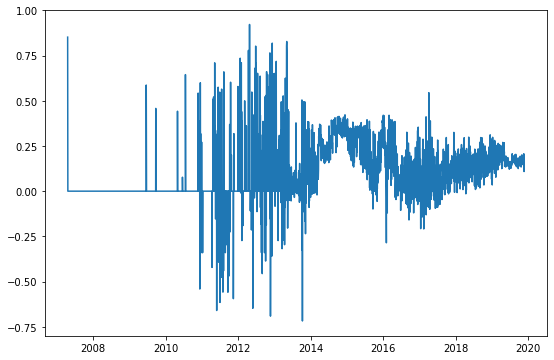

In [ ]:
fig = plt.figure(1, figsize=(9, 6))
plt.plot(scores)

In [ ]:
#installing yfinance (Colab)
!pip install yfinance
#pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

     |████████████████████████████████| 6.3 MB 9.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=c5d8fa715f7054be10193657c68e335b3827524e85b0359c58c2edfc4ce159ae
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
scores['2018']

timestamp
2018-01-01    0.075778
2018-01-02    0.173279
2018-01-03    0.119138
2018-01-04    0.096092
2018-01-05    0.187750
                ...   
2018-12-27    0.186339
2018-12-28    0.233285
2018-12-29    0.066731
2018-12-30    0.255000
2018-12-31    0.228234
Freq: D, Name: Score, Length: 365, dtype: float64

In [ ]:
#Univariate time series
#df_btc= web.DataReader("BTC-USD", 'yahoo')#Use if yfinance does not work
print("-------------------------------- DATA -------------------------------")
df_btc = pdr.get_data_yahoo(["BTC-USD"])
df_btc.head(5)

-------------------------------- DATA -------------------------------
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df_btc.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
               '2021-07-24', '2021-07-25', '2021-07-26', '2021-07-27',
               '2021-07-28', '2021-07-29'],
              dtype='datetime64[ns]', name='Date', length=2504, freq=None)

In [ ]:
p2=pd.concat([df_btc,scores], axis=1, join="inner")
p2.head(5)

,Open,High,Low,Close,Adj Close,Volume,Score
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.284970
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.326157
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0.287608
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.322668
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0.264525


In [ ]:
p2['Cambio']=p2.Close-p2.Open

In [ ]:
def subida(x):
  if x>0:
    return 1
  else:
    return 0

In [ ]:
p2['dummy']=p2.Cambio.apply(subida)

In [ ]:
p2.head()

,Open,High,Low,Close,Adj Close,Volume,Score,Cambio,dummy
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.284970,-8.529999,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.326157,-32.419983,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0.287608,-29.307007,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.322668,14.230988,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0.264525,-9.263977,0


In [ ]:
X=np.array(p2.Score).reshape(-1,1)
y=np.array(p2.dummy)
X.shape

(1894, 1)

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
validation_size=0.20
seed=7
X_train, X_val, y_train, y_val=model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.557084 (0.029065)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
predictions = model.predict(X_val)
print(accuracy_score(y_val, predictions))

0.49340369393139843


In [ ]:
model.fit(X_train,y_train)
predictions = model.predict(X_val)
print(accuracy_score(y_val, predictions))

0.49340369393139843


In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.49      1.00      0.66       187

    accuracy                           0.49       379
   macro avg       0.25      0.50      0.33       379
weighted avg       0.24      0.49      0.33       379



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_val, predictions))

[[  0 192]
 [  0 187]]


In [ ]:
#CHUNKS
columns=['timestamp','text']
data=pd.read_csv('drive/MyDrive/Colab Notebooks/tweets.csv', sep=';', chunksize=500000, usecols=columns,encoding='latin-1' ,engine='python')

In [ ]:
data

In [ ]:
%%time
df_chunk=pd.concat(data)

CPU times: user 2min 51s, sys: 9.54 s, total: 3min 1s
Wall time: 3min 11s


In [ ]:
print(df_chunk.head(5))
print(df_chunk.tail(5))

                timestamp                                               text
0  2019-05-27 11:49:14+00  Ã appena uscito un nuovo video! LES CRYPTOMON...
1  2019-05-27 11:49:18+00  Cardano: Digitize Currencies; EOS https://t.co...
2  2019-05-27 11:49:06+00  Another Test tweet that wasn't caught in the s...
3  2019-05-27 11:49:22+00  Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4  2019-05-27 11:49:23+00  Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
                       timestamp                                               text
16890417  2019-11-23 15:28:50+00  Happy #FibonacciDay \n\nA while back I created...
16890418  2019-11-23 15:45:55+00  Bitcoin Suisse Certificates :) https://t.co/nd...
16890419  2019-11-23 15:45:56+00  Register now for the early access of the Codug...
16890420  2019-11-23 15:45:57+00  @btc \n@btc \nDo you know that BTC Baskets isn...
16890421  2019-11-23 15:45:06+00  $BTC - an update on the longer term view for B...


In [ ]:
df_chunk.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890422 entries, 0 to 16890421
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  object
 1   text       object
dtypes: object(2)
memory usage: 257.7+ MB


In [ ]:
pr_fechas=df_chunk['timestamp'].str.partition(" ")[[0,2]]

In [ ]:
pr_fechas[0:5]

,0,2
0,2019-05-27,11:49:14+00
1,2019-05-27,11:49:18+00
2,2019-05-27,11:49:06+00
3,2019-05-27,11:49:22+00
4,2019-05-27,11:49:23+00
